In [2]:
from matplotlib.pyplot import scatter, title, xlabel, ylabel, figure, title, plot, show, axvline
from pandas import read_csv, DataFrame
from numpy import min
from seaborn import heatmap
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [3]:
# Read csv file 
packages_df = read_csv("datasets/Packstücke.csv", sep=";", header=0)  

# Show first ten rows of dataframe 
packages_df.head(10)

,Package No,Shipment No,Gross Weight (kg),Width (cm),Height (cm),Length (cm)
0,1007530-2011-03239,1000088,23,35,30,35
1,1007530-2011-03241,1000310,150,60,55,80
2,1007530-2011-03242,1000346,"0,5",14,15,19
3,1007530-2011-03243,1000456,"1,5",20,20,29
4,1007530-2011-03244,1000796,1,10,10,10
5,1007530-2011-03245,1000957,75,82,81,120
6,1007530-2011-03246,1000957,41,80,34,120
7,1007530-2011-03247,1001184,1.340,220,112,406
8,1007530-2011-03249,1001408,"0,5",20,20,29
9,1007530-2011-03250,1001563,5,45,35,45


In [4]:
# Show data types of columns
packages_df.dtypes

Package No           object
Shipment No           int64
Gross Weight (kg)    object
Width (cm)           object
Height (cm)           int64
Length (cm)           int64
dtype: object

Text(0, 0.5, 'Length (cm)')

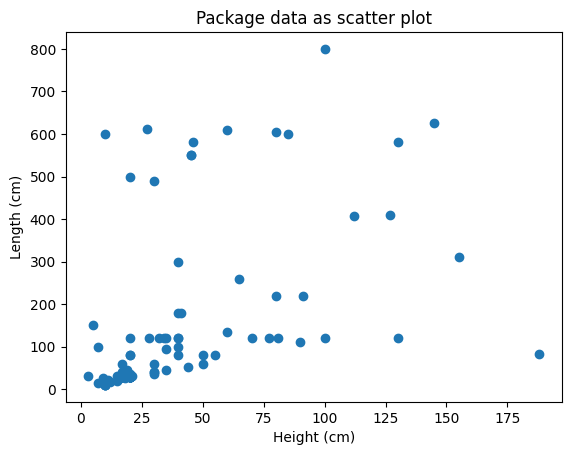

In [5]:
# Plot data as scatter  
scatter(packages_df["Height (cm)"].to_numpy(), packages_df["Length (cm)"].to_numpy())
title("Package data as scatter plot")
xlabel("Height (cm)")
ylabel("Length (cm)")

In [6]:
# Replace "," with "." (us standard)
packages_df["Gross Weight (kg)"] = packages_df.apply(lambda row: str(row["Gross Weight (kg)"]).replace(".", "").replace(",", "."), axis=1)
packages_df["Width (cm)"] = packages_df.apply(lambda row: str(row["Width (cm)"]).replace(".", "").replace(",", "."), axis=1)

# Convert to correct data type
packages_df[["Gross Weight (kg)", "Width (cm)"]] = packages_df[["Gross Weight (kg)", "Width (cm)"]].astype(float)
packages_df[["Height (cm)", "Length (cm)"]] = packages_df[["Height (cm)", "Length (cm)"]].astype(int)
packages_df[["Package No", "Shipment No"]] = packages_df[["Package No", "Shipment No"]].astype(str)

# Calculate volume of each row
packages_df["Volume (m³)"] = packages_df.apply(lambda row: row["Width (cm)"] * row["Height (cm)"] * row["Length (cm)"] / 1000000, axis=1)

# Drop not needed cols
x = packages_df.drop(["Package No", "Shipment No"], axis=1)

# Show first ten rows of dataframe 
x.head(10)

,Gross Weight (kg),Width (cm),Height (cm),Length (cm),Volume (m³)
0,23.0,35.0,30,35,0.036750
1,150.0,60.0,55,80,0.264000
2,0.5,14.0,15,19,0.003990
3,1.5,20.0,20,29,0.011600
4,1.0,10.0,10,10,0.001000
5,75.0,82.0,81,120,0.797040
6,41.0,80.0,34,120,0.326400
7,1340.0,220.0,112,406,10.003840
8,0.5,20.0,20,29,0.011600
9,5.0,45.0,35,45,0.070875


Text(0, 0.5, 'Volume (m³)')

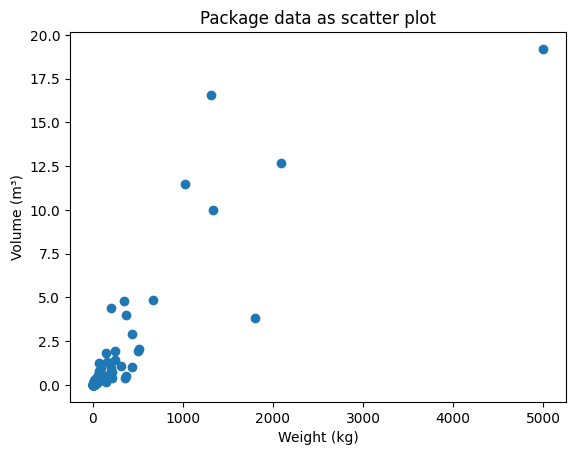

In [7]:
# Plot data as scatter  
scatter(x["Gross Weight (kg)"].to_numpy(), x["Volume (m³)"].to_numpy())
title("Package data as scatter plot")
xlabel("Weight (kg)")
ylabel("Volume (m³)")

Text(0, 0.5, 'Volume (m³)')

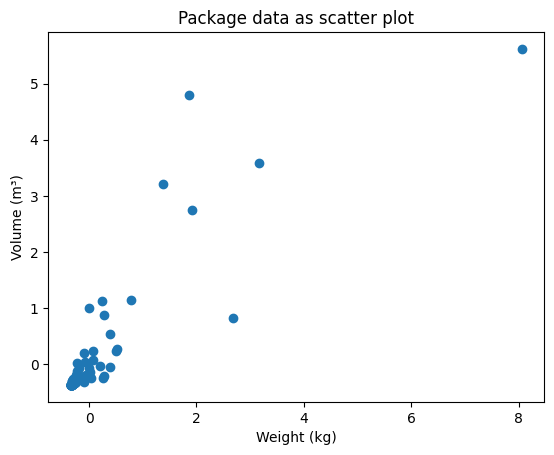

In [8]:
# Normalize data
scaler = preprocessing.StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_weight = scaled_x[:, :1]
scaled_volume = scaled_x[:, 4:5]

# Plot data as scatter  
scatter(scaled_weight, scaled_volume)
title("Package data as scatter plot")
xlabel("Weight (kg)")
ylabel("Volume (m³)")

# kMeans

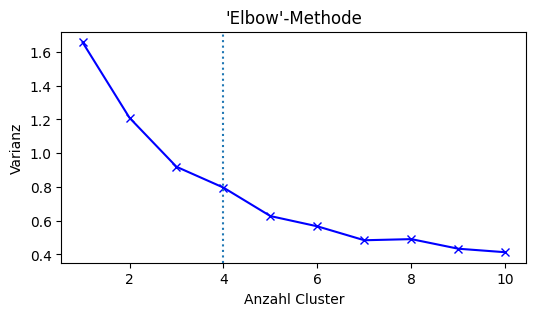

In [9]:
distortions = []
mapping1 = {}
K = range(1, 11)

for k in K:
	kmeanModel = KMeans(n_clusters=k, init = "random").fit(scaled_x)

	distortions.append(sum(min(cdist(scaled_x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / scaled_x.shape[0])
	
	mapping1[k] = sum(min(cdist(scaled_x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / scaled_x.shape[0]

figure(figsize=(6,3))
plot(K, distortions, "bx-")
axvline(x=4, linestyle= ":")
xlabel("Anzahl Cluster")
ylabel("Varianz")
title("'Elbow'-Methode")
show()

In [10]:
# Define 4 Clusters with random starting centers
kmeans2 = KMeans(n_clusters=4, init = "random")

# Prediction via K-Means
y_kmeans2 = kmeans2.fit_predict(scaled_x)

# Predicted allocation of datapoints to estimated clusters
y_kmeans2

array([1, 3, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 0, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 2, 0, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 2], dtype=int32)

Merkmalswerte der Zentren
[[ 0.39287949  0.24461396  0.15230583  2.22797471  0.30158505]
 [-0.32122121 -0.55762004 -0.5501745  -0.54958859 -0.36142197]
 [ 3.2709958   2.92766311  2.32016246  2.19916582  3.99290895]
 [-0.02872001  0.70543198  0.85153223  0.01038866 -0.03890229]]


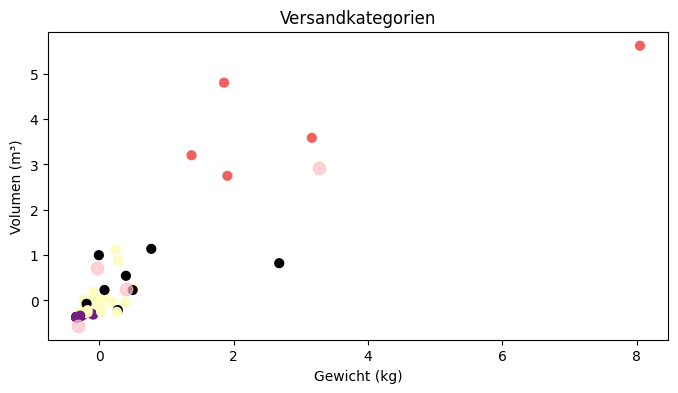

In [11]:
# Visualize allocation of datapoints
figure(figsize=(8,4)) 
scatter(scaled_weight, scaled_volume, c=y_kmeans2, s=40, cmap='magma')

# Visualize Cluster Centers
centers = kmeans2.cluster_centers_
scatter(centers[:,0], centers[:,1], c='pink', s=80, alpha=0.7)

title('Versandkategorien')
xlabel('Gewicht (kg)')
ylabel('Volumen (m³)')

#Print coordinates of Cluster Centers
print('Merkmalswerte der Zentren')
print(centers)

In [12]:
# Define 4 Clusters based on k-means++ for selection of starting centers
kmeans3 = KMeans(n_clusters=4, init="k-means++")

# Prediction via K-Means
y_kmeans3 = kmeans3.fit_predict(scaled_x)

# Predicted allocation of datapoints to estimated clusters
y_kmeans3

array([3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 2, 3, 3,
       3, 2, 2, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 1], dtype=int32)

Merkmalswerte der Zentren
[[ 0.39287949  0.24461396  0.15230583  2.22797471  0.30158505]
 [ 3.2709958   2.92766311  2.32016246  2.19916582  3.99290895]
 [ 0.06444105  0.94378613  1.42443269  0.14819741  0.12538634]
 [-0.29839364 -0.4267248  -0.4657173  -0.49789211 -0.3483916 ]]


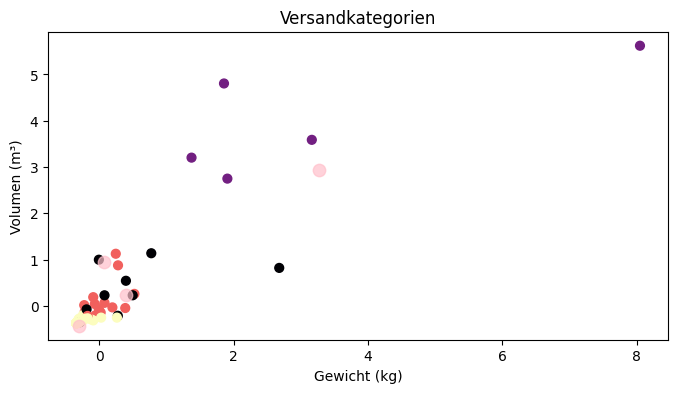

In [13]:
# Visualize allocation of datapoints
figure(figsize=(8,4)) 
scatter(scaled_weight, scaled_volume, c=y_kmeans3, s=40, cmap='magma')

# Visualize Cluster Centers
centers = kmeans3.cluster_centers_
scatter(centers[:,0], centers[:,1], c='pink', s=80, alpha=0.7)

title('Versandkategorien')
xlabel('Gewicht (kg)')
ylabel('Volumen (m³)')

#Print coordinates of Cluster Centers
print('Merkmalswerte der Zentren')
print(centers)

# Hierachical

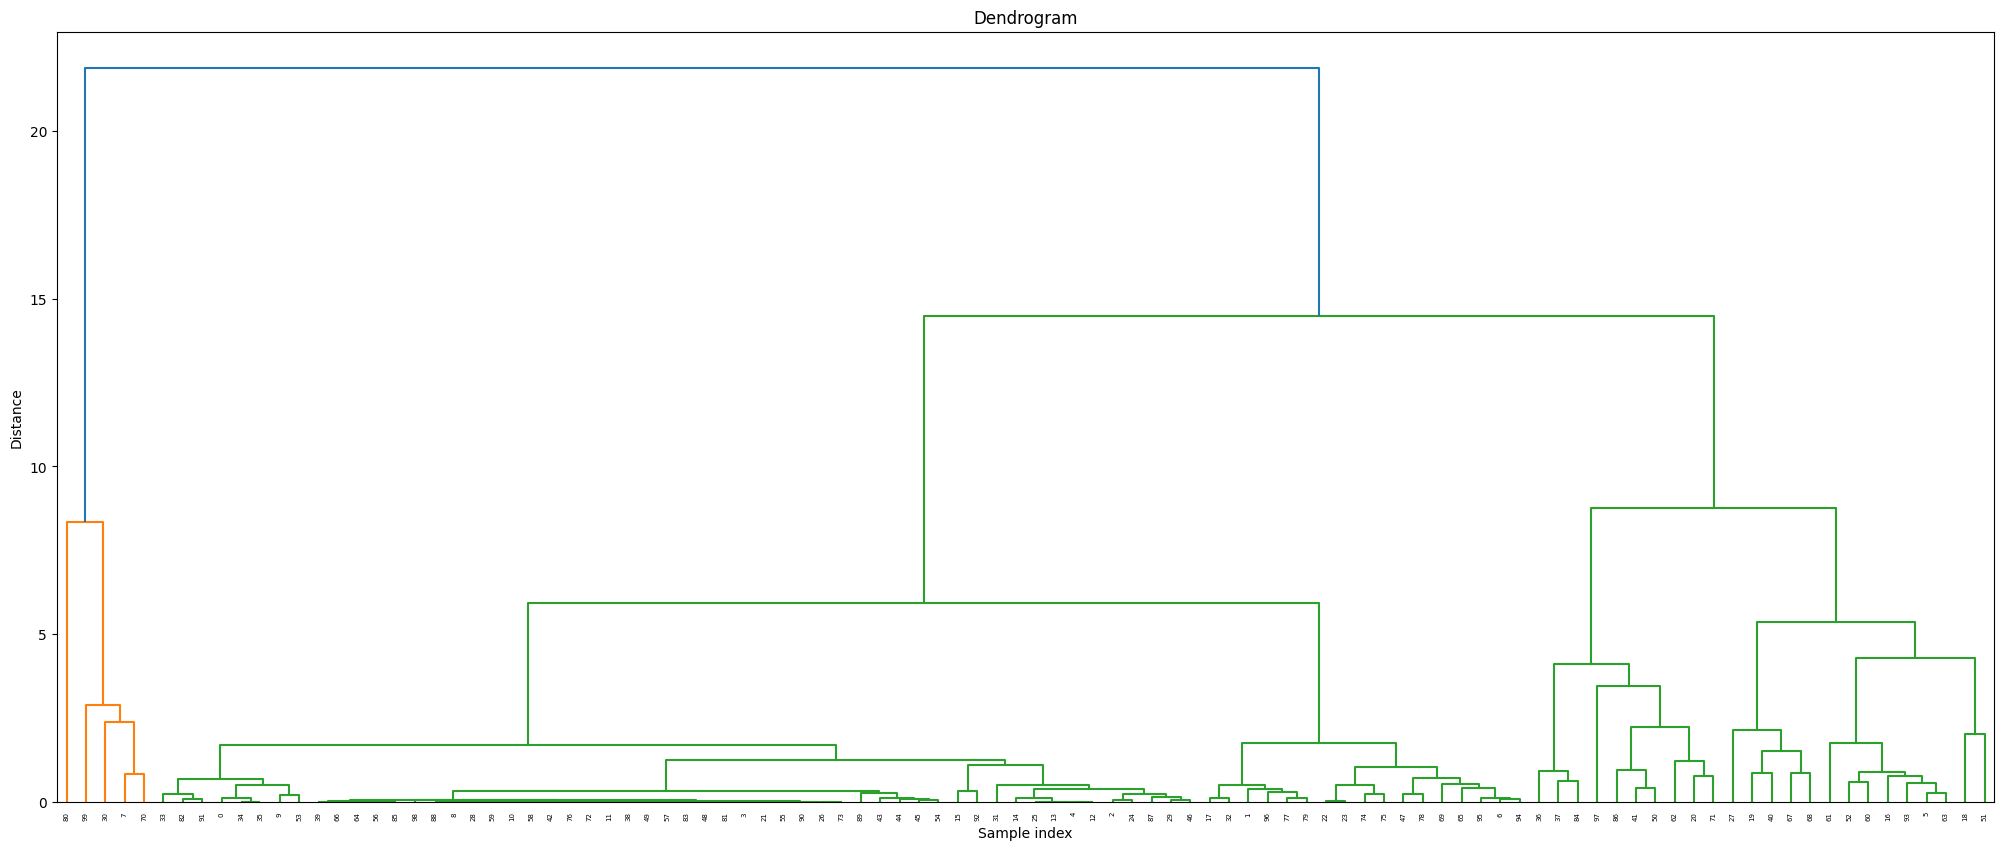

In [14]:
# Plot dendrogram
figure(figsize=(25, 10))
title("Dendrogram")
xlabel("Sample index")
ylabel("Distance")
dend = dendrogram(linkage(scaled_x, method="ward"))

/tmp/ipykernel_21019/1736319244.py:42: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_scores = df_scores.pivot("Distance- & Linkage-Method", "Number of clusters", "score")


<AxesSubplot: title={'center': 'Comparison of distance, linkage methods and increasing number of clusters'}, xlabel='Number of clusters', ylabel='Distance- & Linkage-Method'>

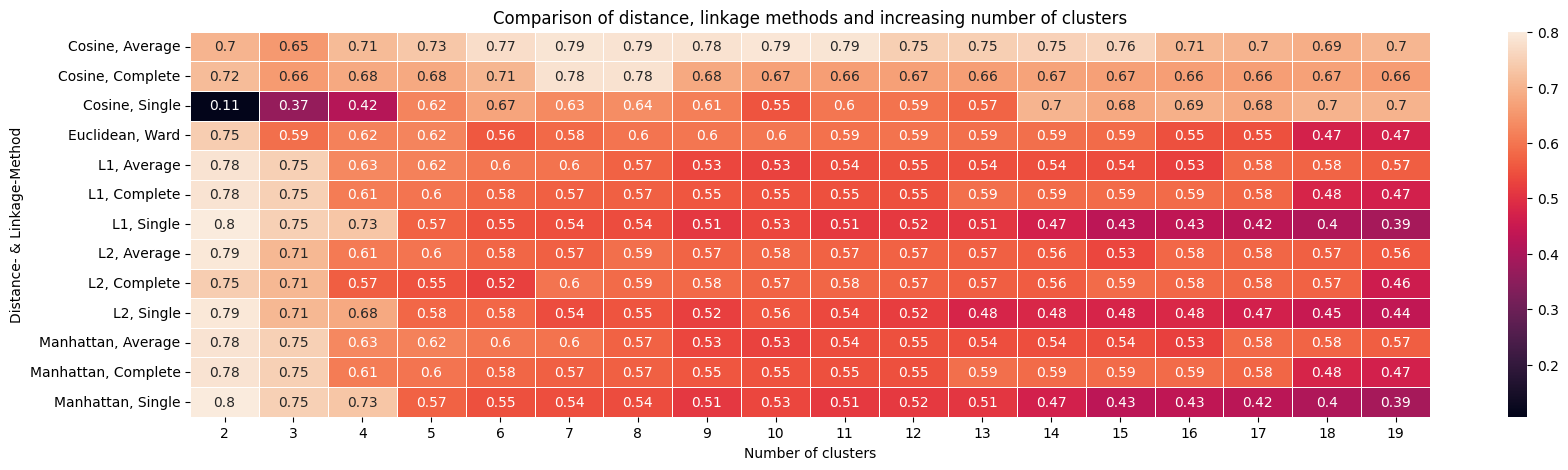

In [15]:
# Build agglomerative clusters and compare by affinity, linkage method and by amount of clusters (through silhouette score)
scores = []
for i in range(2, 20):
    y_cluster_euc_war = AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward").fit_predict(scaled_x)

    y_cluster_l1_com = AgglomerativeClustering(n_clusters=i, affinity="l1", linkage="complete").fit_predict(scaled_x)
    y_cluster_l1_avg = AgglomerativeClustering(n_clusters=i, affinity="l1", linkage="average").fit_predict(scaled_x)
    y_cluster_l1_sin = AgglomerativeClustering(n_clusters=i, affinity="l1", linkage="single").fit_predict(scaled_x)

    y_cluster_l2_com = AgglomerativeClustering(n_clusters=i, affinity="l2", linkage="complete").fit_predict(scaled_x)
    y_cluster_l2_avg = AgglomerativeClustering(n_clusters=i, affinity="l2", linkage="average").fit_predict(scaled_x)
    y_cluster_l2_sin = AgglomerativeClustering(n_clusters=i, affinity="l2", linkage="single").fit_predict(scaled_x)

    y_cluster_man_com = AgglomerativeClustering(n_clusters=i, affinity="manhattan", linkage="complete").fit_predict(scaled_x)
    y_cluster_man_avg = AgglomerativeClustering(n_clusters=i, affinity="manhattan", linkage="average").fit_predict(scaled_x)
    y_cluster_man_sin = AgglomerativeClustering(n_clusters=i, affinity="manhattan", linkage="single").fit_predict(scaled_x)

    y_cluster_cos_com = AgglomerativeClustering(n_clusters=i, affinity="cosine", linkage="complete").fit_predict(scaled_x)
    y_cluster_cos_avg = AgglomerativeClustering(n_clusters=i, affinity="cosine", linkage="average").fit_predict(scaled_x)
    y_cluster_cos_sin = AgglomerativeClustering(n_clusters=i, affinity="cosine", linkage="single").fit_predict(scaled_x)


    scores.append({"Distance- & Linkage-Method": "Euclidean, Ward", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_euc_war, metric="euclidean")})
    
    scores.append({"Distance- & Linkage-Method": "L1, Complete", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_l1_com, metric="l1")})
    scores.append({"Distance- & Linkage-Method": "L1, Average", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_l1_avg, metric="l1")})
    scores.append({"Distance- & Linkage-Method": "L1, Single", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_l1_sin, metric="l1")})

    scores.append({"Distance- & Linkage-Method": "L2, Complete", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_l2_com, metric="l2")})
    scores.append({"Distance- & Linkage-Method": "L2, Average", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_l2_avg, metric="l2")})
    scores.append({"Distance- & Linkage-Method": "L2, Single", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_l2_sin, metric="l2")})

    scores.append({"Distance- & Linkage-Method": "Manhattan, Complete", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_man_com, metric="manhattan")})
    scores.append({"Distance- & Linkage-Method": "Manhattan, Average", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_man_avg, metric="manhattan")})
    scores.append({"Distance- & Linkage-Method": "Manhattan, Single", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_man_sin, metric="manhattan")})

    scores.append({"Distance- & Linkage-Method": "Cosine, Complete", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_cos_com, metric="cosine")})
    scores.append({"Distance- & Linkage-Method": "Cosine, Average", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_cos_avg, metric="cosine")})
    scores.append({"Distance- & Linkage-Method": "Cosine, Single", "Number of clusters": i, "score": silhouette_score(scaled_x, y_cluster_cos_sin, metric="cosine")})

df_scores = DataFrame(scores)
df_scores = df_scores.pivot("Distance- & Linkage-Method", "Number of clusters", "score")

# Plot comparison
figure(figsize = (20,5))
title("Comparison of distance, linkage methods and increasing number of clusters")
heatmap(df_scores, annot=True, linewidth=.5)

Text(0, 0.5, 'Volume (m³)')

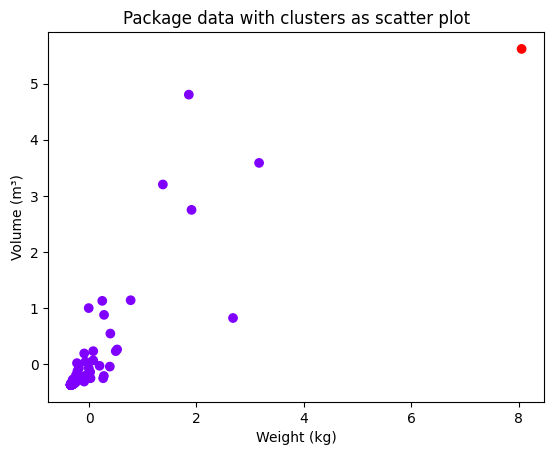

In [16]:
# Plot final cluster decision
cluster_final = AgglomerativeClustering(n_clusters=2, affinity="l1", linkage="single")
y_cluster_final = cluster_final.fit_predict(scaled_x)
scatter(scaled_weight, scaled_volume, c=y_cluster_final, cmap="rainbow")
title("Package data with clusters as scatter plot")
xlabel("Weight (kg)")
ylabel("Volume (m³)")